In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import math
from matplotlib import animation

In [37]:
# Initial conditions for Case 1 and exact solution
dir0 = 0.0  # u(-L,t)= dir0
dir1 = 0.0  # u(L,t)= dir1

# function for setting initial conditions in space
def I(x): # initial u(x,0)
    result = []
    len_x = np.size(x)
    i_x = np.zeros(len_x)
    for x_i in x:
        i_x = norm.pdf(x_i, 0, 1/(2**2))
        result.append(i_x)
    return result


#Note - I'm assuming D=1
def U_exact(x,t):
    M = np.size(x)
    u_ex = np.zeros(M)
    if t == 0:
        u_ex = norm.pdf(x,0,1/(2**2))
    else:
        y = x - v*t
        u_ex = np.exp(-y**2/(4*t))/np.sqrt(4*np.pi*t)
        u_ex[0] = dir0
        u_ex[M-1] = dir1
    return u_ex

def U_exact_erf(x,t):
    M = np.size(x)
    u_ex = np.zeros(M)
    if t == 0:
        u_ex = norm.pdf(x,0,1/(2**2))
    else:
        u_ex = norm.pdf(x,0,1/(2**2))*(1 - scipy.special.erfc(((x-v*t)/np.sqrt(4*t))))
        u_ex[0] = dir0
        u_ex[M-1] = dir1
    return u_ex

In [36]:
## ====== setting parameters =======
Nt_gaps = 2**10  # number of timesteps
L = 2**5 # final distance
T = 1  # final time 
Nt_points = Nt_gaps + 1
h = T/(Nt_points)  # time step

t = np.linspace(0.,T,Nt_points)  # times at each time step
Nx_spaces = 2**8; # number of spaces in x direction
Nx_points = Nx_spaces + 1 
x_pde = np.linspace(-L, L, Nx_points)    # mesh points in space
dx = x_pde[1] - x_pde[0] 
dt = t[1] - t[0]

# Setting B, C and v for the numerical soultions
C = dt/(dx**2)
v = 10
B = v*dt/(2*dx)
print("Delta x =", dx, "Delta t = ", dt, "C =", C)


##----------intialise lists ------------------------
# Define the numerical solution 
# the first index is space and the second time
U = np.zeros((Nx_points,Nt_points))

# The initial condition
U[:,0]=I(x_pde)
# enforcing the boundary condition
U[-L,:]  = dir0 
U[L,:] = dir1

Delta x = 0.25 Delta t =  0.0009765625 C = 0.015625


In [40]:
x_ex = np.linspace(-L, L, Nx_points)
def plotting(U,L,type):
    size_t = np.size(U,1)-1 # number of time steps
   
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    markers =['X','.','+','o']

    colours = ['r','g','b','purple','yellow'] # make comparison easy
    colours1 = ['b','purple','yellow','r','g',]
    colour_pos = 0;



# some arbitarily chosen time points to compare at
    for plot_pos in [0, int(size_t/10),int(size_t/5), int(size_t/2), int(size_t)]:
        if type == "exact":
            U_tplot = U_exact(x_ex,t[plot_pos])
            label = "Exact, t=" + "%0.3f" % (t[plot_pos],)
            ax.plot(x_ex,U_tplot,linestyle = ':',color = colours[colour_pos],marker = ".",markersize = 1, label=label)
            colour_pos = colour_pos + 1;
    # numerical solution
        else:
            label = "Numerical PDE, t=" + "%0.3f" % (t[plot_pos],)
            ax.plot(x_pde,U[:,plot_pos],color = colours[colour_pos],ls='--', label=label)
            colour_pos = colour_pos + 1;

    plt.xlim(-L,L) # zoom in on area of interest
    ax.legend() # turn on legend 
    plt.show()

(257, 1025)


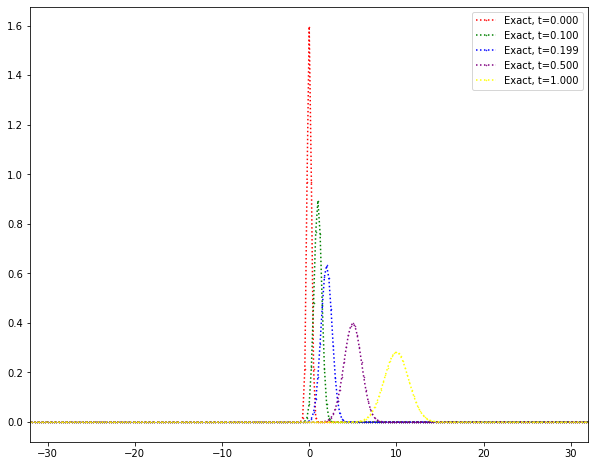

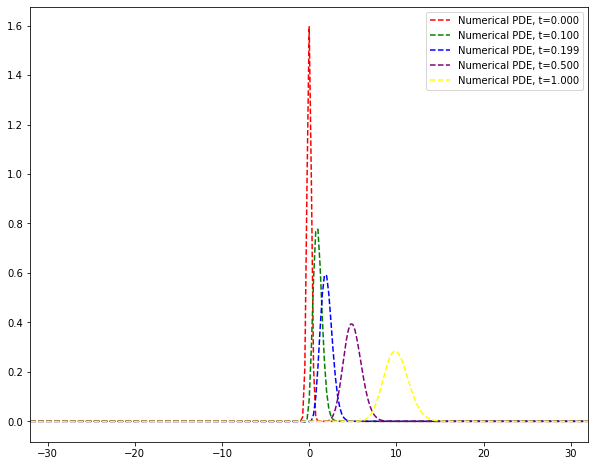

In [41]:
u_old = I(x_pde)

u = np.zeros(Nx_points)
# and to store the full solution
U = np.zeros((Nx_points,Nt_points))
U[:,0] = u_old
for n in range(1, Nt_points):  
    # set Dirichlet boundary points here
    #...
    # compute u at inner mesh points
    for i in range(1, Nx_points-1):
        u[i] = (1-2*C)*u_old[i] + (C+B)*(u_old[i-1]) + (C-B)*(u_old[i+1])
 
    # update u_old before next step
    u_old[:]= u

    # copy into full storage
    U[:,n] = u;
print(U.shape)
plotting(U,L, "exact")
plotting(U,L, "numerical")

In [6]:
#Note - I'm assuming D=1
def U_exact(x,t):
    M = np.size(x)
    u_ex = np.zeros(M)
    for x_i in x:
        if t == 0:
            x_i = norm.pdf(x[i], 0, 1/(2**12))
    else:
        x_i = 1/(2*np.pi*t)*np.exp(-x**2/(4*t))
    return u_ex